20 out of 50 random points are inside the boundary.


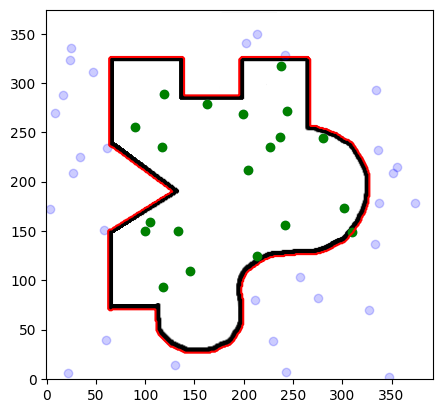

Actual area = 137250
The area of the figure is approximately 54900.00 square units.


In [59]:
from skimage import io, measure
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path

# Load the image
image = io.imread('./Capture.PNG', as_gray=True)


# Get the width and height of the image
height, width = image.shape

# Convert the image to binary format
binary = image > 0.5

# Extract the contours of the figure
contours = measure.find_contours(binary, 0.5)

# Get the boundary points of the largest contour
largest_contour = max(contours, key=len)
boundary_points = np.flipud(largest_contour)


# Generate 1000 random points within the image boundaries
height, width = image.shape
num_points = 50
random_points = np.random.rand(num_points, 2) * [width, height]

# Check which random points are inside the boundary
path = Path(boundary_points)
# Check if the points are inside the boundary
is_inside = path.contains_points(random_points)
# Get the points inside the boundary
inside_points = random_points[is_inside]
# Get the number of points inside
num_inside_points = len(inside_points)

# Print the result
print(f"{num_inside_points} out of {num_points} random points are inside the boundary.")

# Plot the image and the boundary points
fig, ax = plt.subplots()
ax.imshow(image, cmap='gray')
ax.plot(boundary_points[:, 1], boundary_points[:, 0], color='red')

# Plot the random points
ax.scatter(random_points[:, 1], random_points[:, 0], color='blue', alpha=0.2)

# Plot the points inside the boundary
ax.scatter(inside_points[:, 1], inside_points[:, 0], color='green')

# Invert the y-axis
ax.invert_yaxis()

# Show the plot
plt.show()

# Calculate the actual area
print("Actual area =" , (width * height))
# Calculate the area of the figure
area_of_irregular_figure = (num_inside_points / num_points) * (width * height)

print(f"The area of the figure is approximately {area_of_irregular_figure:.2f} square units.")


13 out of 50 random points are inside the boundary.


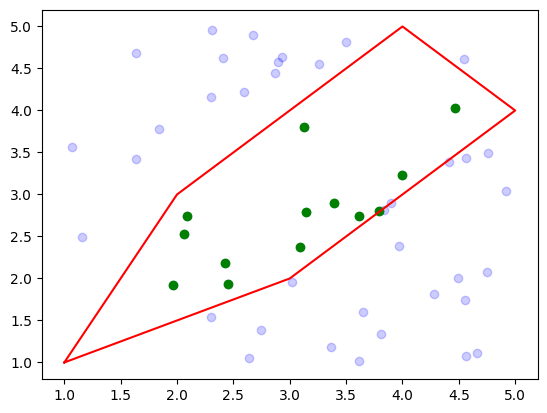

Actual Area: 5.5
The area of the figure is approximately 4.16 square units.


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from shapely.geometry import Polygon

# Define the coordinates of the irregular figure
x_coords = [1, 3, 5, 4, 2 , 1]  # Example x-coordinates
y_coords = [1, 2, 4, 5, 3 , 1]  # Example y-coordinates



# Get the boundary points of the figure
boundary_points = np.column_stack((x_coords, y_coords))

# Generate random points within the figure boundaries
num_points = 50
x_min, x_max = min(x_coords), max(x_coords)
y_min, y_max = min(y_coords), max(y_coords)
random_points = np.random.rand(num_points, 2) * [x_max - x_min, y_max - y_min] + [x_min, y_min]

# Check which random points are inside the boundary
path = Path(boundary_points)
is_inside = path.contains_points(random_points)
inside_points = random_points[is_inside]
num_inside_points = len(inside_points)

# Print the result
print(f"{num_inside_points} out of {num_points} random points are inside the boundary.")

# Plot the boundary points
fig, ax = plt.subplots()
ax.plot(x_coords, y_coords, color='red')

# Plot the random points
ax.scatter(random_points[:, 0], random_points[:, 1], color='blue', alpha=0.2)

# Plot the points inside the boundary
ax.scatter(inside_points[:, 0], inside_points[:, 1], color='green')

# Show the plot
plt.show()


# Calculate the actual area
polygon = Polygon(zip(x_coords, y_coords))
actual_area = polygon.area
print("Actual Area:", actual_area)


# Calculate the area of the figure
area_of_irregular_figure = (num_inside_points / num_points) * ((x_max - x_min) * (y_max - y_min))

print(f"The area of the figure is approximately {area_of_irregular_figure:.2f} square units.")
